In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from classes.VillaData import getVillaData, getVillaDataRaw, trainModel, testModel, saveModel, loadModel

In [11]:
%matplotlib inline

In [12]:
data = getVillaData()
data.describe()

Data was already cleaned


,Adresse,Year build,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Etager,Seneste ombygning,Varmeinstallation,Grundstørrelse
count,17430.000000,17430.000000,17430.000000,17430.000000,17430.000000,17430.000000,17430.000000,17430.000000,17430.000000,17430.000000,17430.000000,17430.000000,17430.000000,17430.000000
mean,6828.615491,1954.386919,7.852324,2222.700803,148.325531,4.874986,1.625186,1.330809,7.837751,4.699369,1.027080,1972.101492,3.355364,802.744464
std,2067.957408,33.257255,1.563539,914.488798,41.659617,1.393216,0.588993,0.525038,1.073819,4.204350,0.168903,29.969546,1.277829,279.050815
min,2005.000000,1852.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1852.000000,0.000000,0.000000
25%,5200.000000,1932.000000,7.000000,1578.000000,120.000000,4.000000,1.000000,1.000000,8.000000,2.000000,1.000000,1961.000000,2.000000,664.000000
50%,6955.000000,1962.000000,8.000000,2040.000000,145.000000,5.000000,2.000000,1.000000,8.000000,2.000000,1.000000,1976.000000,4.000000,805.000000
75%,8700.000000,1974.000000,9.000000,2634.000000,173.000000,6.000000,2.000000,2.000000,8.000000,11.000000,1.000000,1995.000000,4.000000,976.000000
max,9990.000000,2019.000000,11.000000,9074.000000,299.000000,9.000000,3.000000,3.000000,10.000000,11.000000,4.000000,2020.000000,7.000000,1498.000000


### Features

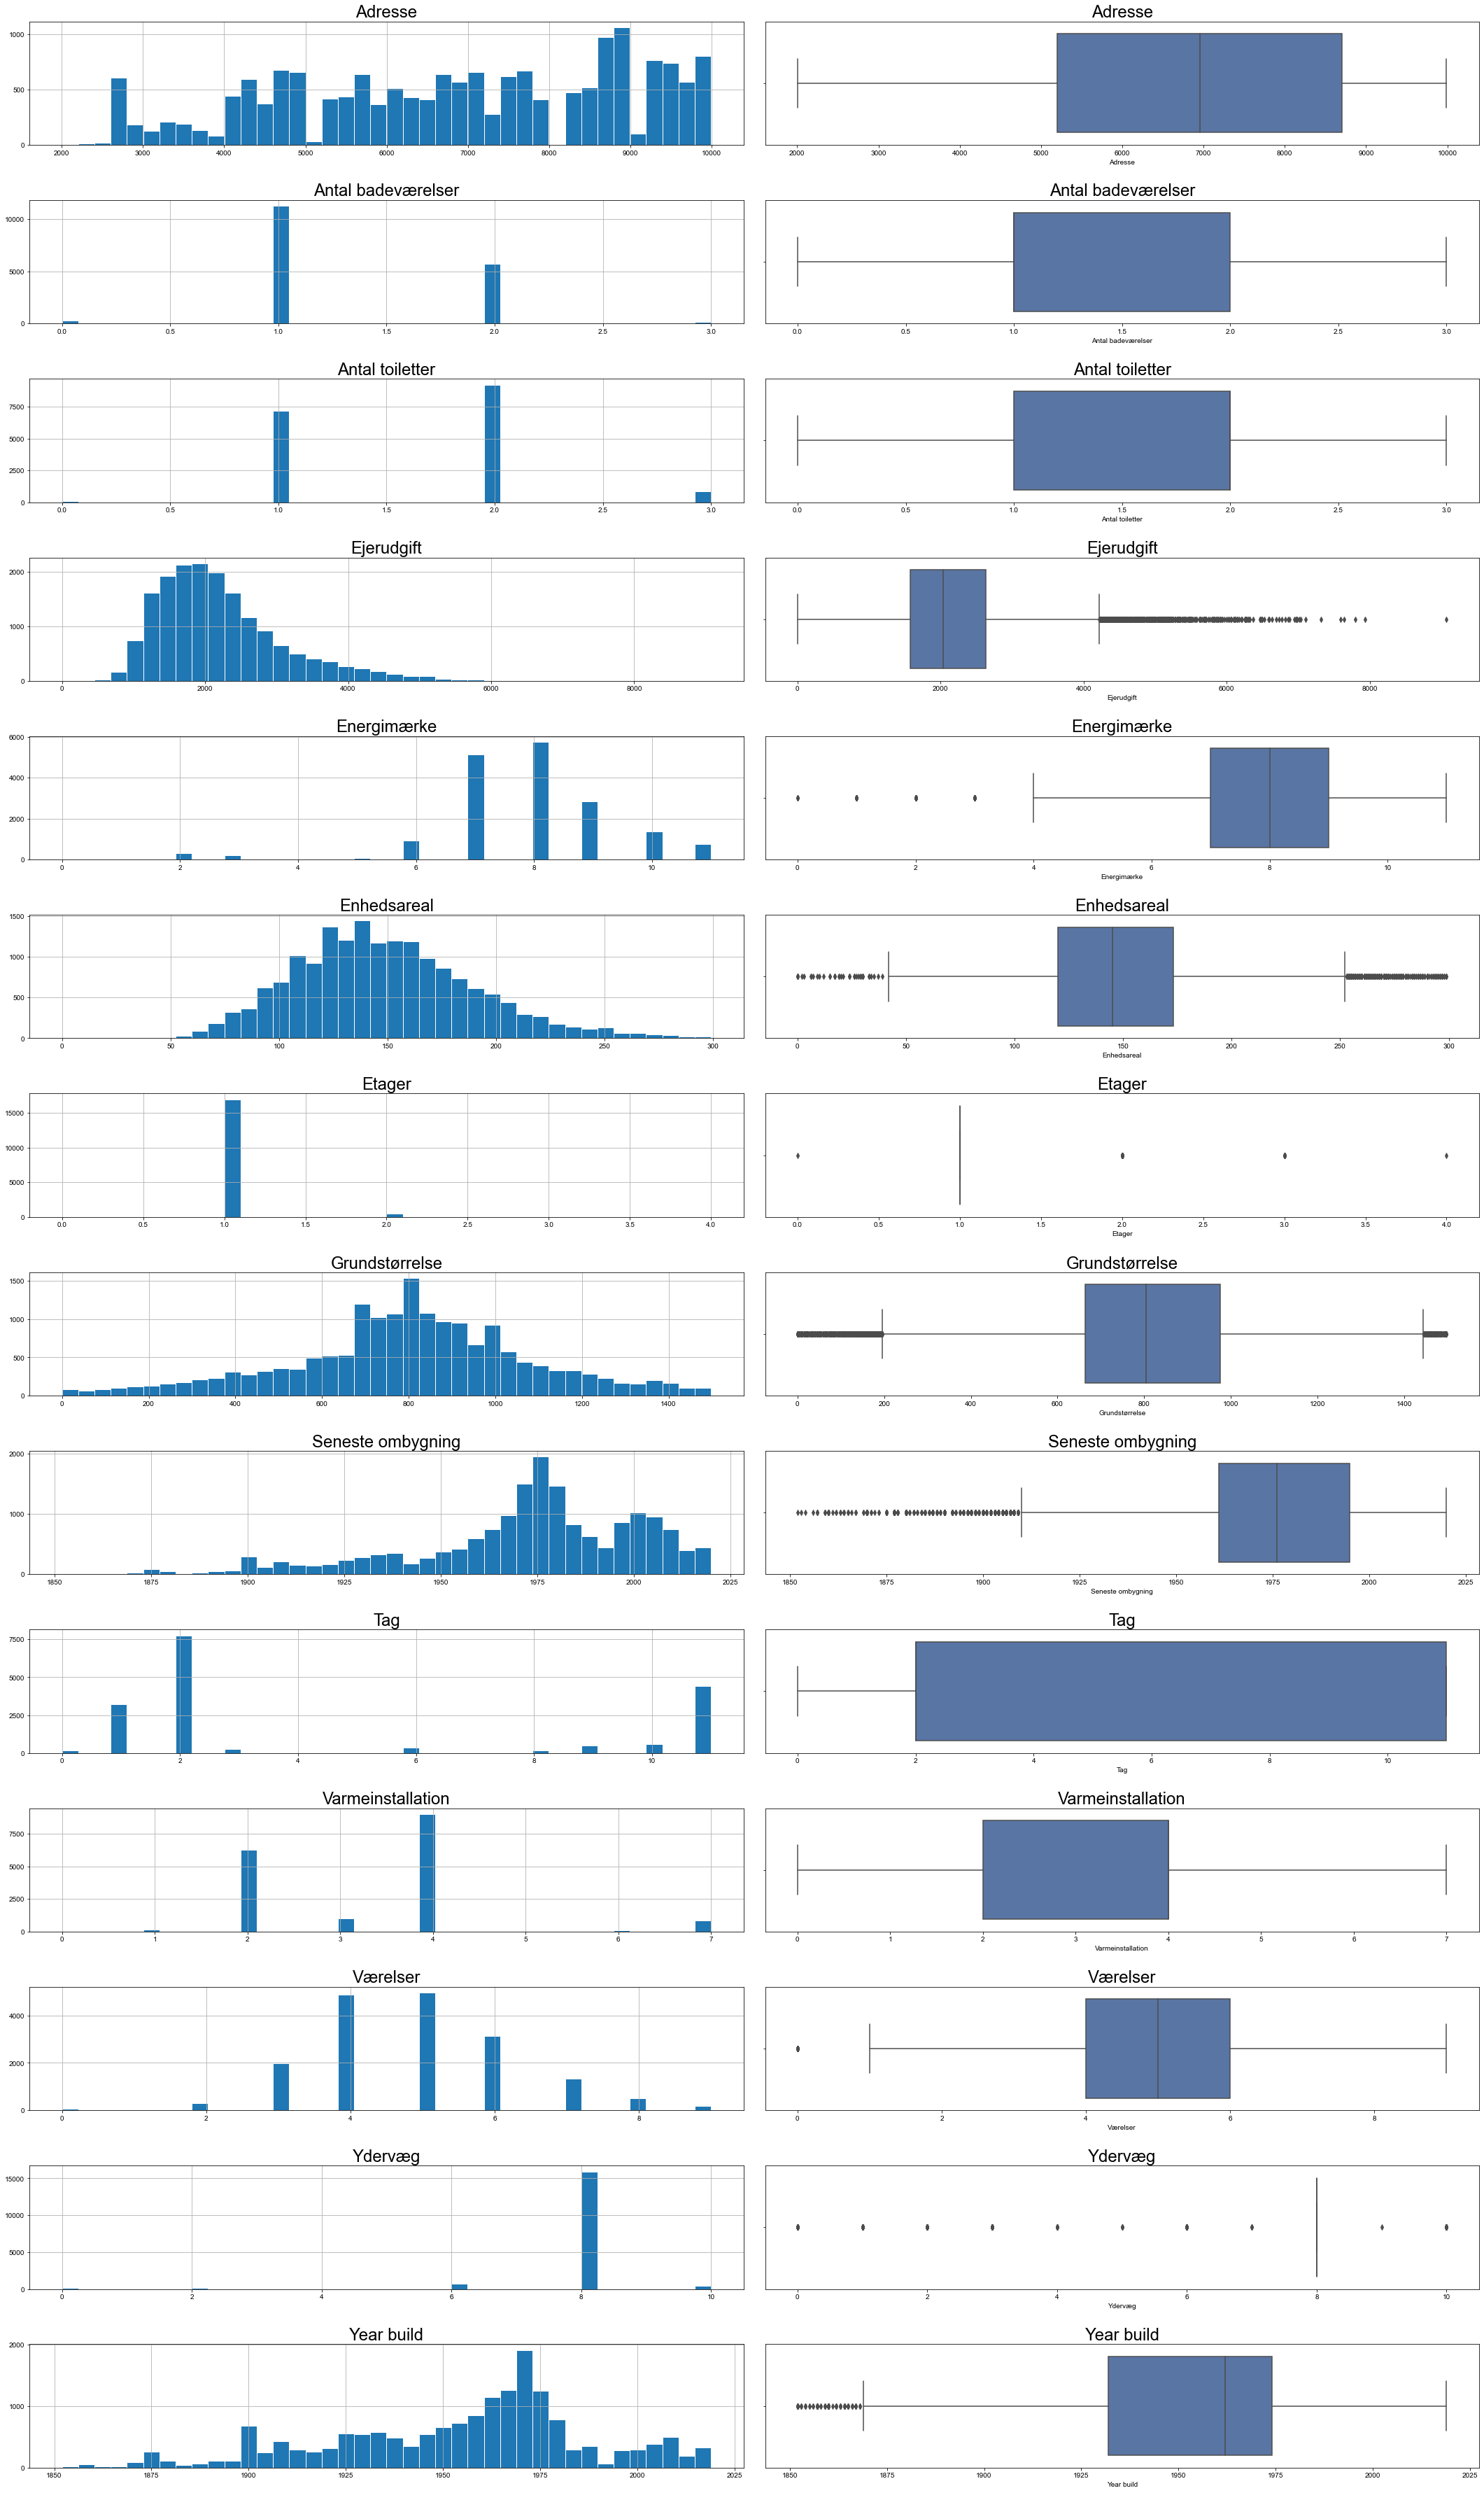

In [13]:
columns = np.setdiff1d(data.columns.to_numpy(),'Pris')
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(30,50))
sb.set(font_scale=2)

for col in enumerate(columns):
    data[col[1]].hist(ax=axes[col[0],0], bins=40);
    axes[col[0],0].set_title(col[1])
    sb.boxplot(ax=axes[col[0],1], x=data[col[1]])
    axes[col[0],1].set_title(col[1])

plt.tight_layout()

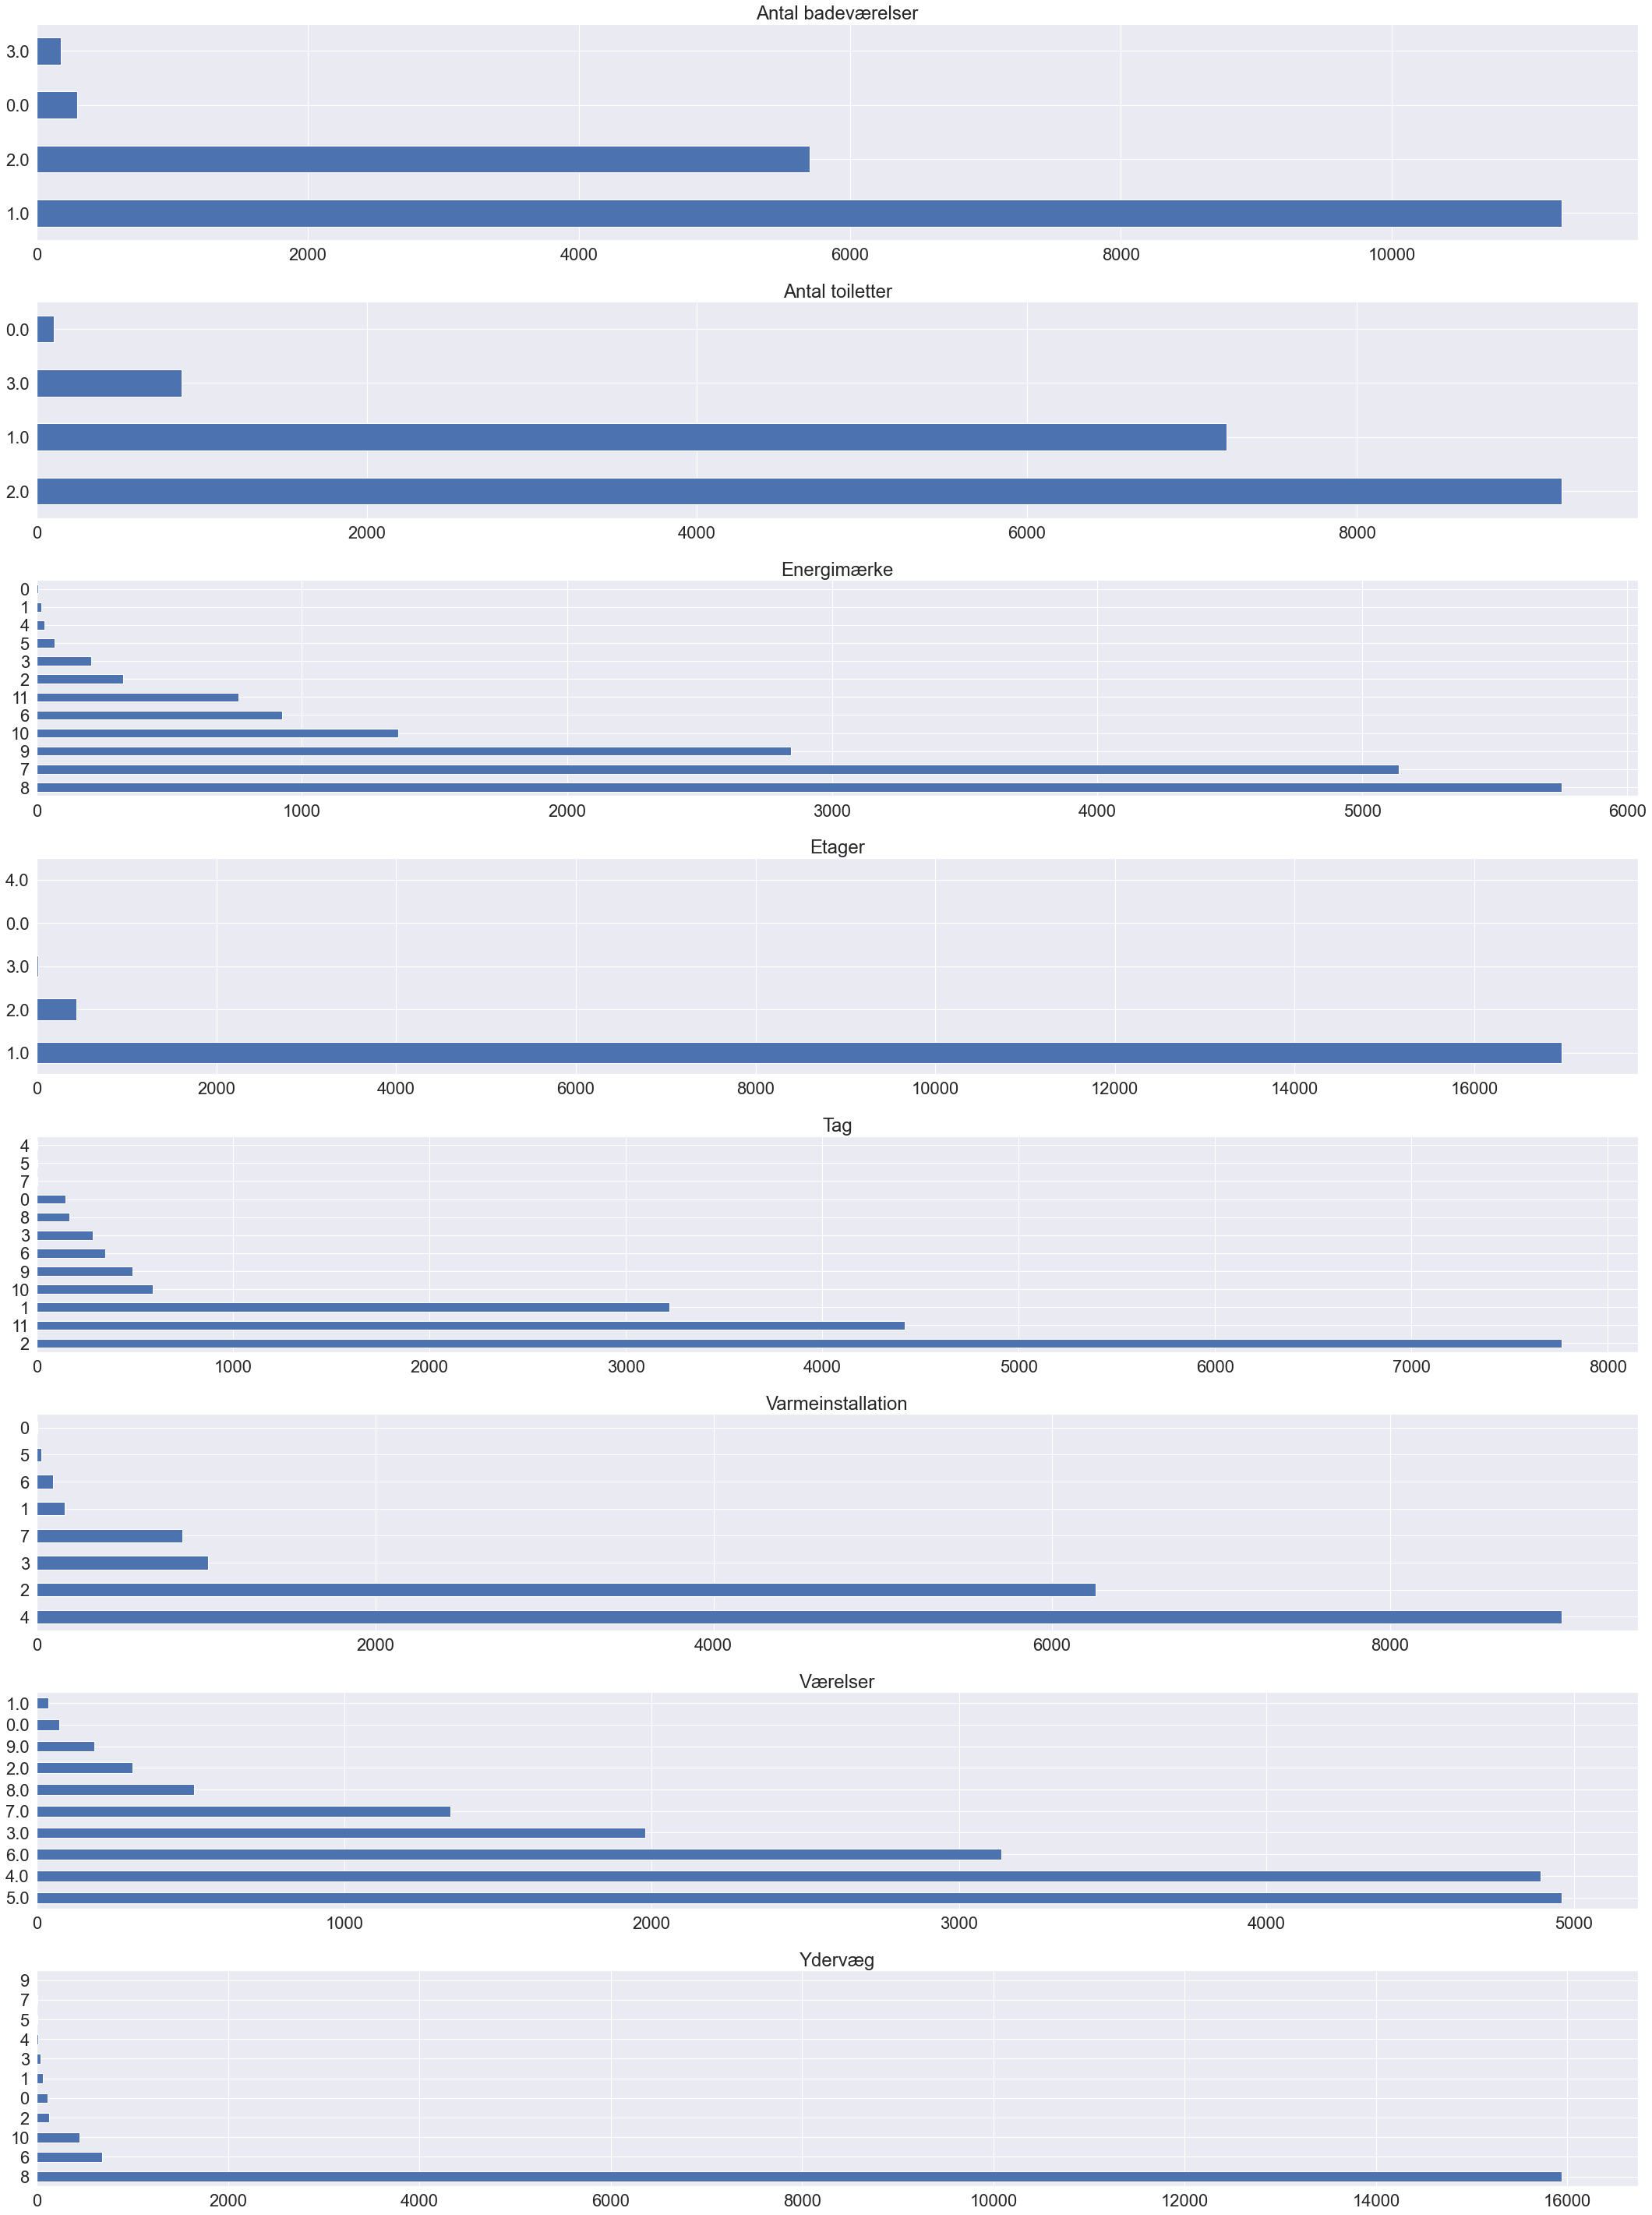

In [4]:
columns = ['Antal badeværelser', 'Antal toiletter', 'Energimærke', 'Etager', 'Tag', 'Varmeinstallation', 'Værelser', 'Ydervæg']
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(30,40))
sb.set(font_scale=2)

for col in enumerate(columns):
    pd.value_counts(data[col[1]]).plot(kind='barh',ax=axes[col[0]])
    axes[col[0]].set_title(col[1]);
    
plt.tight_layout()

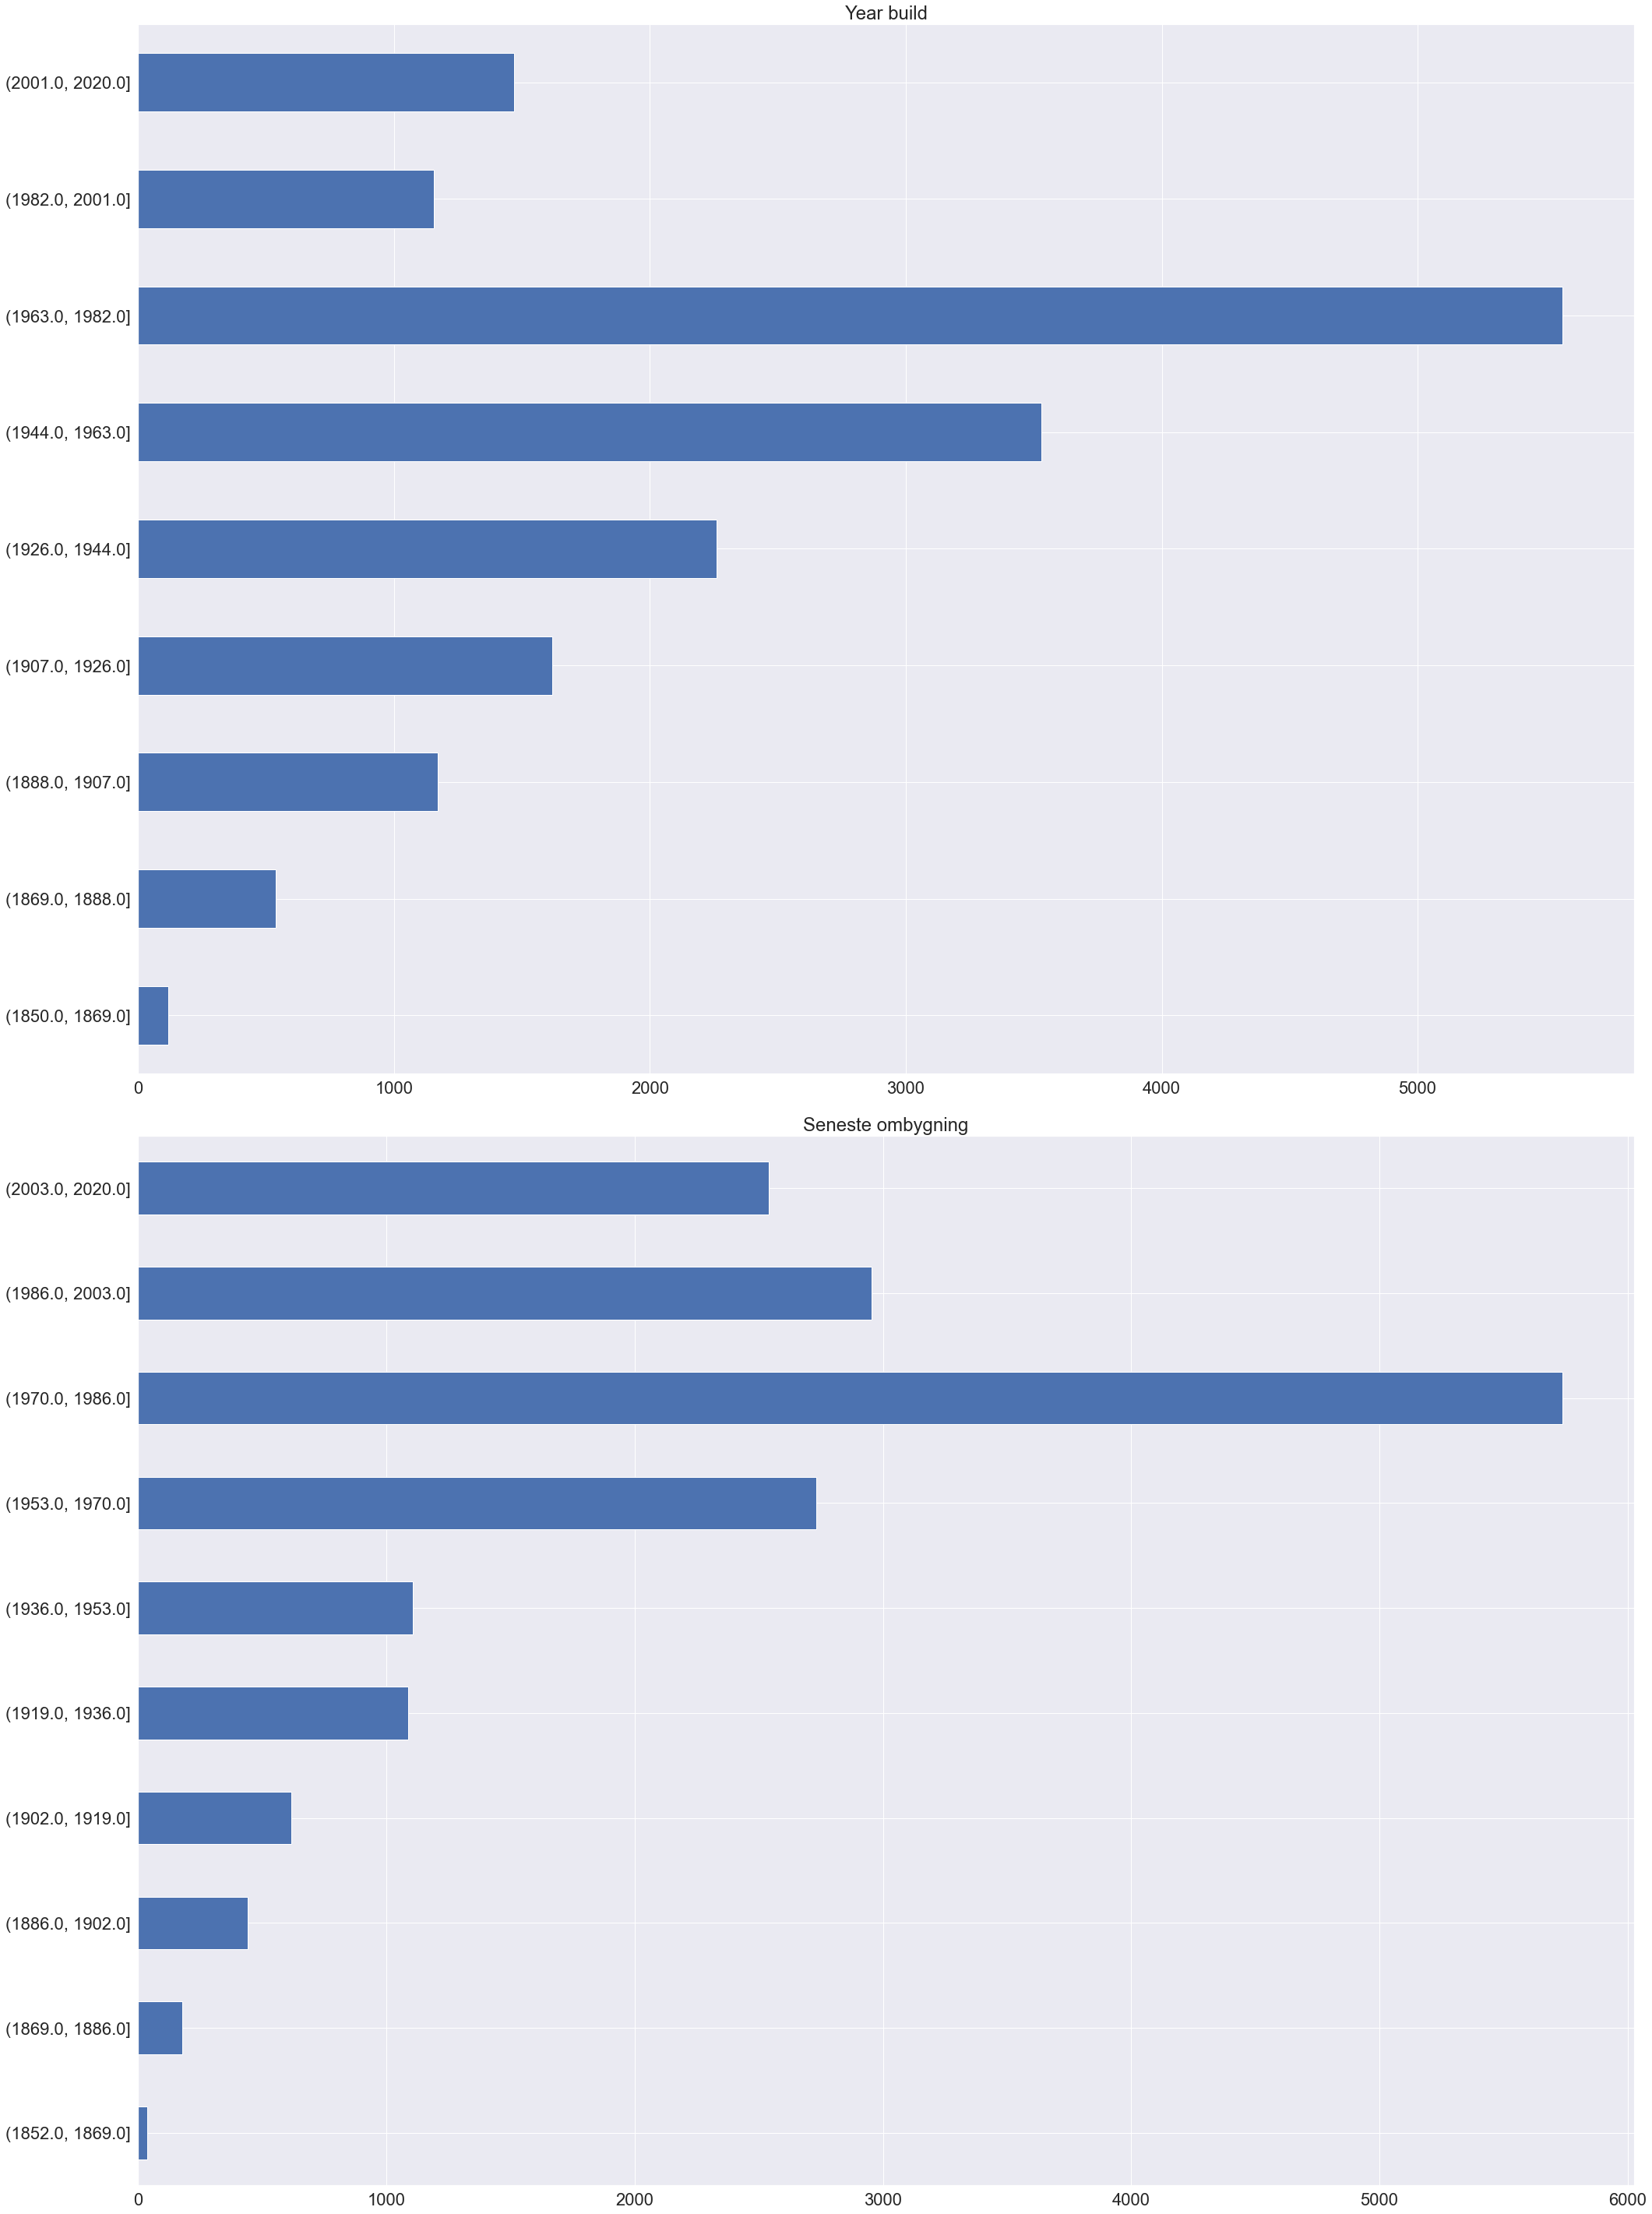

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,40))
sb.set(font_scale=2)

bins = np.linspace(1850, 2020, 10)
pd.value_counts(pd.cut(data['Year build'], bins=bins, precision=0), sort=False).plot(kind='barh',ax=axes[0])
axes[0].set_title('Year build');

bins = np.linspace(1850, 2020, 10)
pd.value_counts(pd.cut(data['Seneste ombygning'], 10, precision=0), sort=False).plot(kind='barh',ax=axes[1])
axes[1].set_title('Seneste ombygning');



plt.tight_layout()

### Target

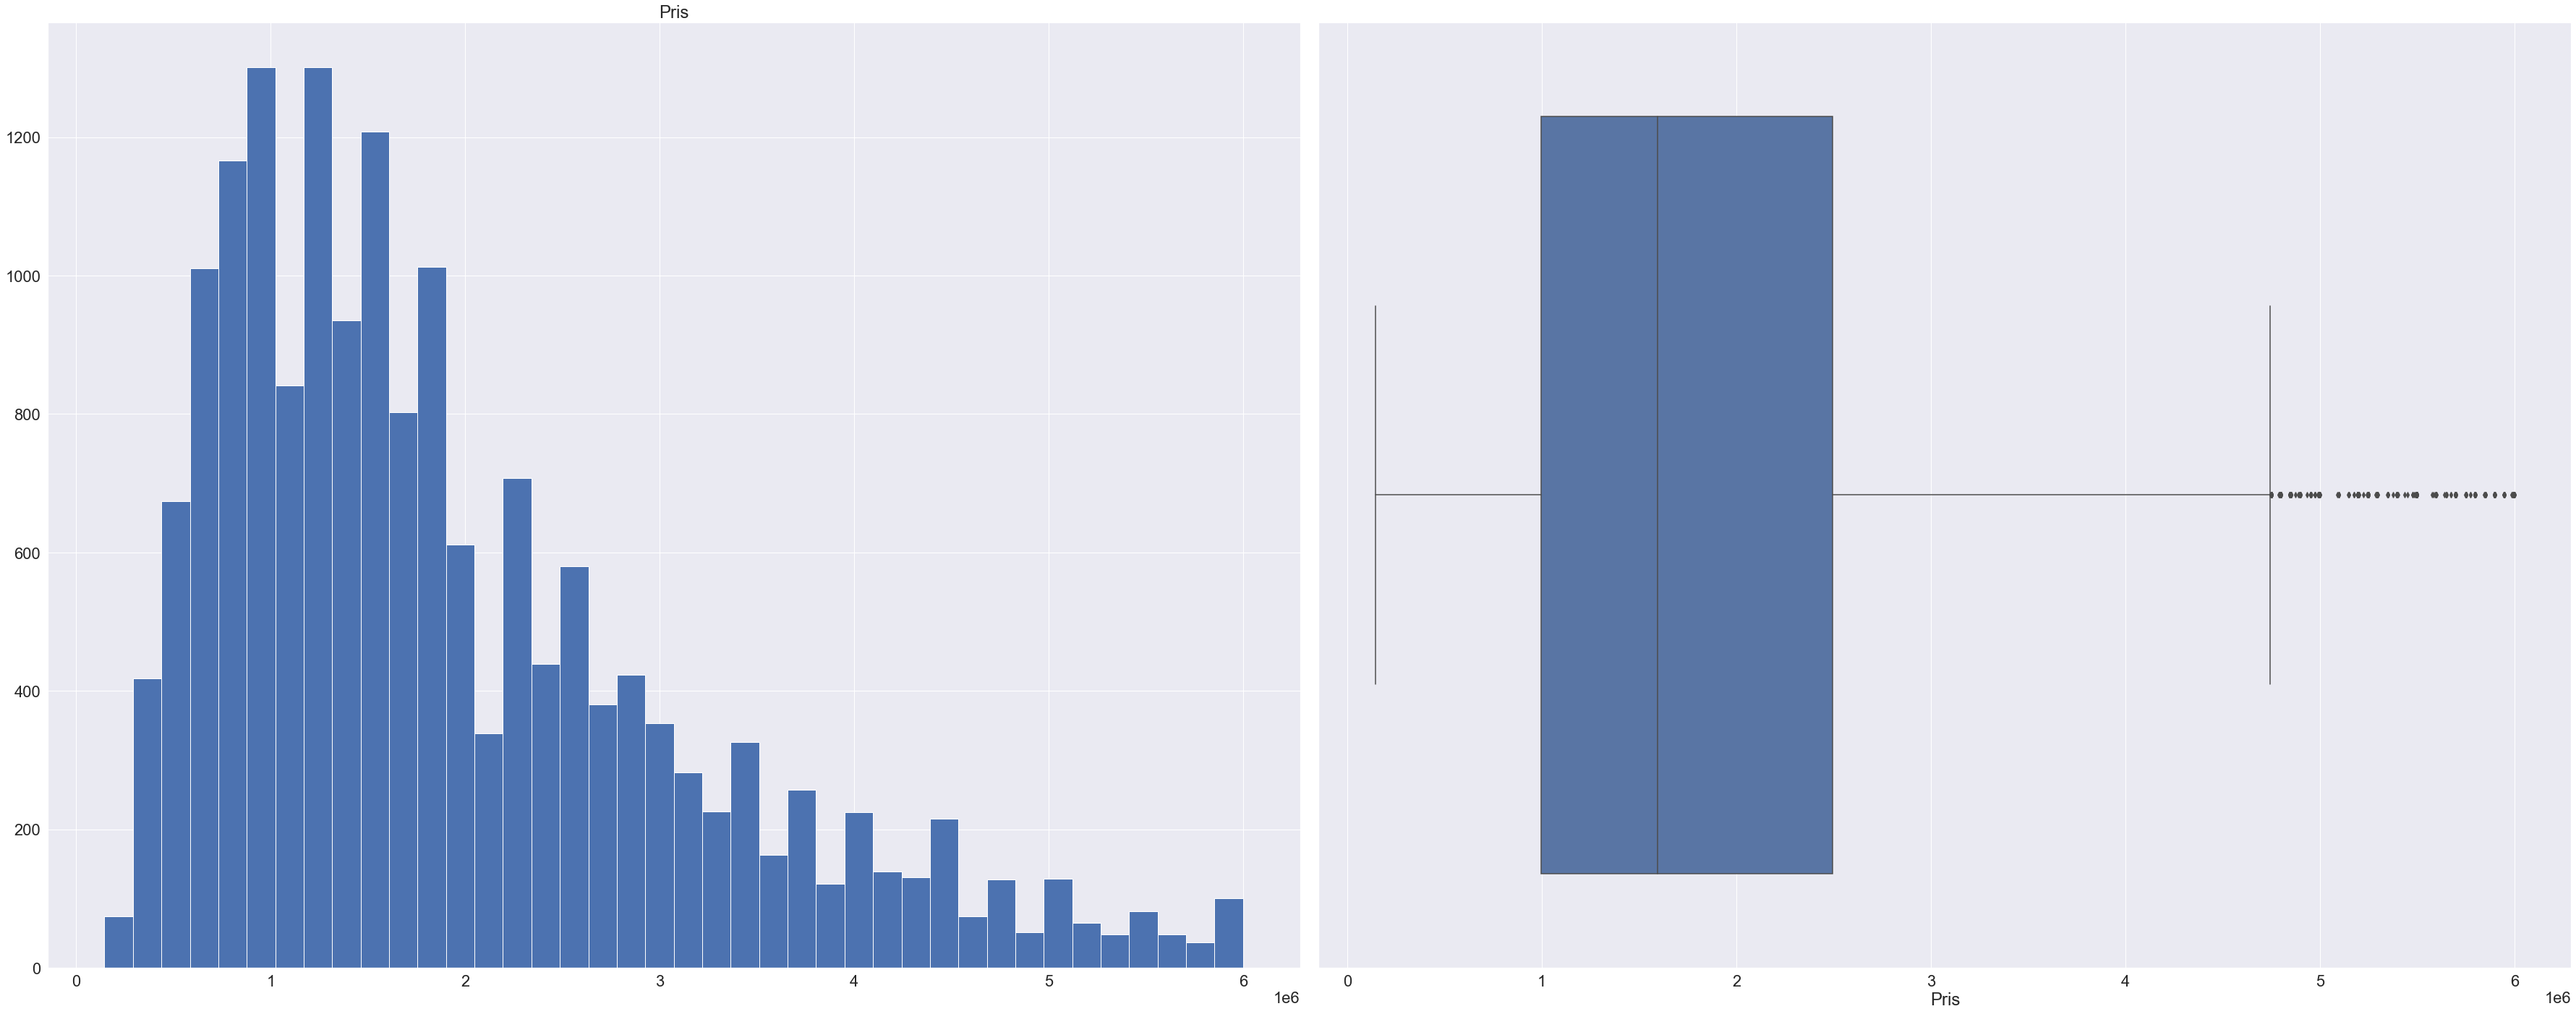

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50,20))
sb.set(font_scale=2)

data['Pris'].hist(ax=axes[0], bins=40);
axes[0].set_title('Pris')
sb.boxplot(ax=axes[1], x=data['Pris'])

plt.tight_layout()

##### Model

In [7]:
trainModel()

Data was already cleaned
Model trained


In [8]:
testModel()

0.780238329228199

In [9]:
X_test, y_test = saveModel()

Model saved!


In [10]:
model = loadModel('./data/villa_model.pickle')
model.score(X_test, y_test)

0.780238329228199

In [16]:
X_test[:1]

,Adresse,Year build,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Etager,Seneste ombygning,Varmeinstallation,Grundstørrelse
23956,4400,1897,7,1732,138,4.0,1.0,1.0,8,2,1.0,1978.0,4,567.0
